In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 1000)

In [5]:
seasons = [2015, 2016, 2017, 2018, 2019]

In [7]:
coop_lst = []
url = 'https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_'
for season in seasons:
    print(f'Reading in Play-By-Play data for the {season} season')
    season_pbp = pd.read_csv(f'{url}{season}.csv')
    coop_pbp = season_pbp.loc[season_pbp.receiver_player_id == '00-0031544']
    coop_lst.append(coop_pbp)
    
coop_df = pd.concat(coop_lst).reset_index(drop=True)

Reading in Play-By-Play data for the 2015 season
Reading in Play-By-Play data for the 2016 season
Reading in Play-By-Play data for the 2017 season
Reading in Play-By-Play data for the 2018 season
Reading in Play-By-Play data for the 2019 season


In [ ]:
#dal_pbp_df.loc[dal_pbp_df.receiver_player_name == 'A.Cooper'].receiver_player_id.value_counts()

In [9]:
coop_df['game_date'] = pd.to_datetime(coop_df['game_date'])

In [ ]:
dal_pbp_df.sort_values('game_date')

In [ ]:
coop_df = dal_pbp_df.loc[(dal_pbp_df.play_type == 'pass') &
                         ( dal_pbp_df.receiver_player_id == '00-0031544')].reset_index(drop=True)

In [ ]:
coop_df.sort_values('game_date')

In [15]:
coop_df['month'] = coop_df.game_date.dt.month


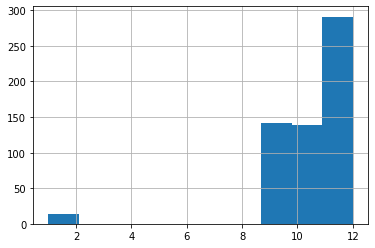

In [16]:
coop_df.groupby['month']['']

In [31]:
yards_in_a_month = coop_df.groupby(['month'], as_index = False)['yards_gained'].sum()

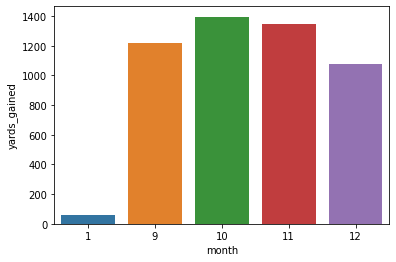

In [27]:
sns.barplot(x= 'month', y = 'yards_gained', data=yards_in_a_month)

In [56]:
team_yards_in_a_month = coop_df.groupby(['month', 'posteam'], as_index = False)['yards_gained'].sum() \
    .sort_values(['month', 'posteam'])

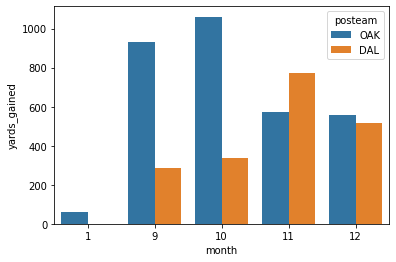

In [57]:
sns.barplot(x= 'month', y = 'yards_gained', data=team_yards_in_a_month, hue='posteam')

In [58]:
team_games_in_a_month = coop_df.groupby(['month', 'posteam'], as_index=False)['game_id'] \
    .agg({'games': pd.Series.nunique}) \
    .sort_values(['month', 'posteam'])

In [61]:
graph_df = team_yards_in_a_month.merge(team_games_in_a_month, on = ['month', 'posteam'])

In [63]:
graph_df['yards_per_game'] = graph_df['yards_gained'] / graph_df['games']

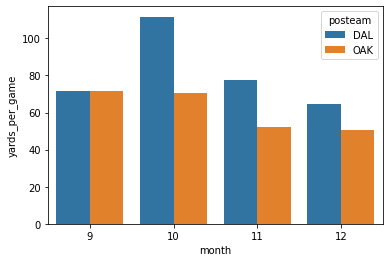

In [65]:
sns.barplot(x='month', y='yards_per_game', hue='posteam', data=graph_df.loc[graph_df.month != 1])

In [67]:
import calmap

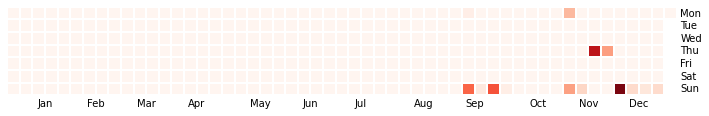

In [91]:
plt.figure(figsize=(12,18))
calmap.yearplot(coop_df.groupby('game_date')['yards_gained'].sum(), year=2018)

<Figure size 864x1296 with 0 Axes>

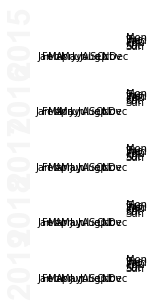

In [94]:
plt.figure(figsize=(12,18))
calmap.calendarplot(coop_df.groupby('game_date')['yards_gained'].sum());

(<Figure size 864x576 with 5 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b4955c0>,
       dtype=object))

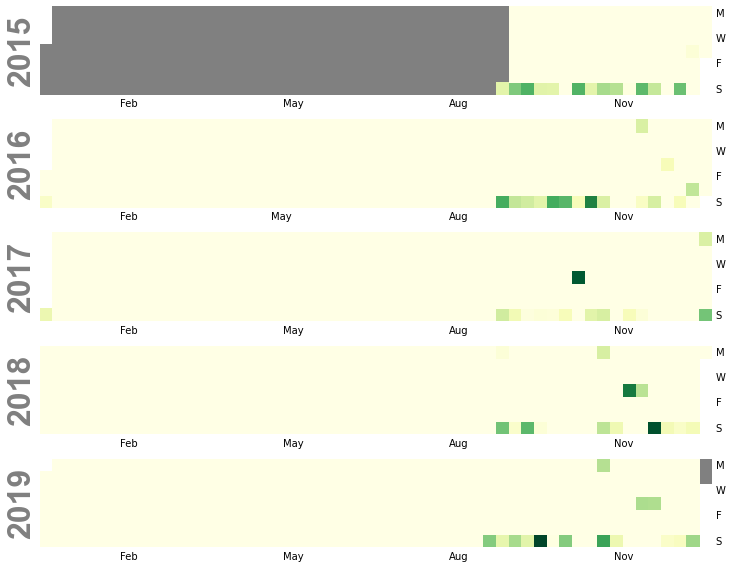

In [96]:
calmap.calendarplot(coop_df.groupby('game_date')['yards_gained'].sum(), monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(12, 8)))